In [1]:
MAIN_PATH = "/home/carlos/MasterDS/tfm"
JSON_DATA_PATH = '{}/data/json/'.format(MAIN_PATH)
CSV_DATA_PATH = '{}/data/csv/'.format(MAIN_PATH)

In [2]:
import sys
sys.path.insert(0, MAIN_PATH)

In [3]:
%load_ext autoreload
%autoreload 2
from scripts.models.ltr_nn_tf.train import LTRNNTFTrain
from scripts.models.ltr_nn_tf.metrics import LTRNNTFMetrics

%reload_ext autoreload

# Entrenamiento

In [4]:
ltr_params = {
    'mode': 'tfidf',
    'count_vec_kwargs': {'strip_accents': 'unicode'},
    'target_metric': 'cosine_tfidf',
    'metric_params': {'ngram_range': (1, 2), 'strip_accents': 'unicode'},
    'drop_teams': True,
    'lemma': True,
    'train_perc': 0.7,
    'val_perc': 0.2
}
DENSE_LAYERS = [500, 250, 125, 60, 20]
N_DROPOUT = 4

model_params = {
    'dense_layers': DENSE_LAYERS,
    'dense_activation': ['relu'] * len(DENSE_LAYERS),
    'dropout': [0.3] * N_DROPOUT,
    'optimizer': 'adam'
}
opt_metric = 'mean_squared_error'
epochs = 25
batch_size = 128
# Not in config
shuffle = True
max_queue_size = 50

In [5]:
ltr_train = LTRNNTFTrain(ltr_params, epochs=epochs, batch_size=batch_size,
                         model_params=model_params,
                         opt_metric=opt_metric)

Adding 1 zeros so that params have the same length
Setting target metric to cosine_tfidf
Setting mode to tfidf
Optimizing mean_squared_error with adam
Epochs: 25
Batch size: 128


In [13]:
ltr_train.pipeline()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               3275500   
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 125)               31375     
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0         
______________________________

In [7]:
ltr_train.train()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Loading validation data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/11aeeba295
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3275500   
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 125)        

In [8]:
X_train, y_train = ltr_train.train_data()

Loading training data from /home/carlos/MasterDS/tfm/data/ltr/features_targets/98a1222ae6


In [8]:
type(y_train)

numpy.ndarray

In [9]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [10]:
X_train.shape

(339040, 6550)

## Métricas

Usando el objeto history de Keras:

In [8]:
history = ltr_train.read_model_info()

In [9]:
history

{'loss': [0.019302211701869965,
  0.01830342225730419,
  0.017889242619276047,
  0.017553197219967842,
  0.01721826009452343,
  0.016932418569922447],
 'mean_squared_error': [0.019302211701869965,
  0.01830342225730419,
  0.017889242619276047,
  0.017553197219967842,
  0.01721826009452343,
  0.016932418569922447],
 'mean_absolute_error': [0.11013186722993851,
  0.10610971599817276,
  0.10448887199163437,
  0.1032312735915184,
  0.10195325314998627,
  0.1008995994925499],
 'val_loss': [0.018474945798516273,
  0.018355965614318848,
  0.018219327554106712,
  0.01823270693421364,
  0.018262676894664764,
  0.01835719682276249],
 'val_mean_squared_error': [0.018474945798516273,
  0.018355965614318848,
  0.018219327554106712,
  0.01823270693421364,
  0.018262676894664764,
  0.01835719682276249],
 'val_mean_absolute_error': [0.10755938291549683,
  0.10752414911985397,
  0.10667713731527328,
  0.10712136328220367,
  0.10709353536367416,
  0.10695946961641312]}

Usando nuestros procesos:

In [6]:
ltr_metrics = LTRNNTFMetrics(ltr_train)

In [7]:
ltr_metrics.run()

Computing metric for train dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/598b6e8db8/train_metrics.pickle
Computing metric for validation dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/598b6e8db8/validation_metrics.pickle
Computing metric for test dataset
Writing metrics to /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/598b6e8db8/test_metrics.pickle


Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/598b6e8db8/train_metrics.pickle
mse : 0.016000763820052322
mae : 0.09851320048623849
r2 : 0.3452788771760076


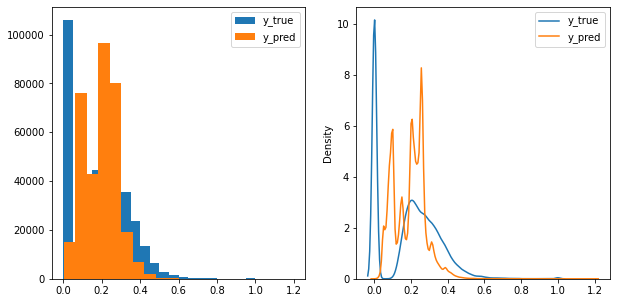

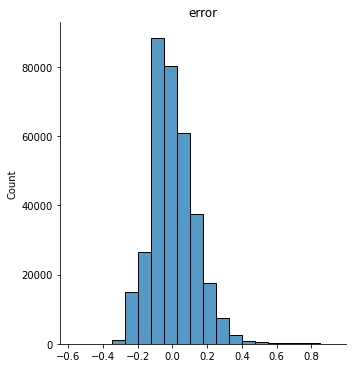

In [8]:
ltr_metrics.show_metrics('train')

Reading metrics from /home/carlos/MasterDS/tfm/models/ltr_nn_tfidf/598b6e8db8/validation_metrics.pickle
mse : 0.01835719253502316
mae : 0.10695946923628305
r2 : 0.2536192134307391


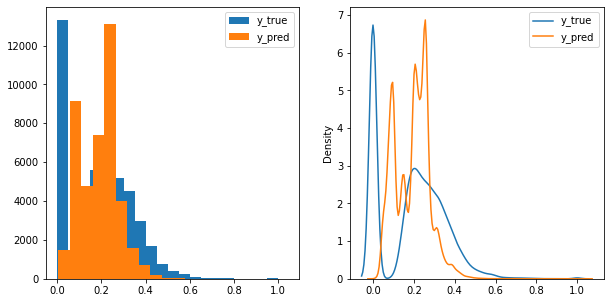

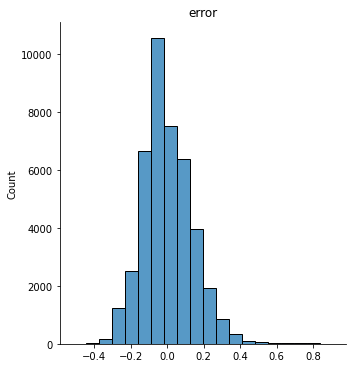

In [9]:
ltr_metrics.show_metrics('validation')

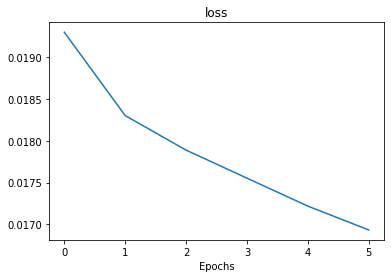

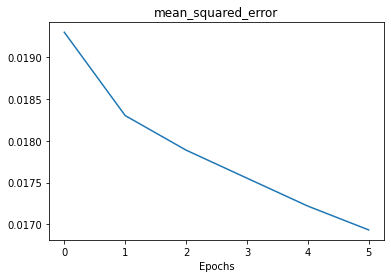

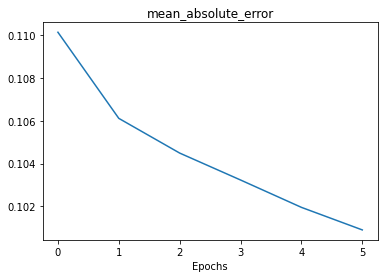

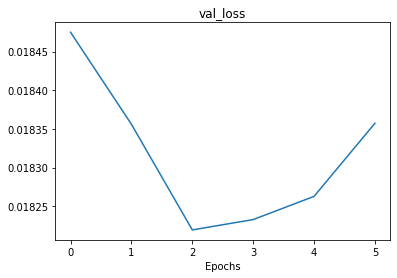

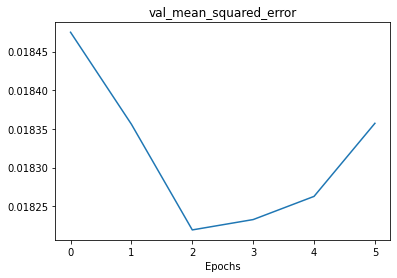

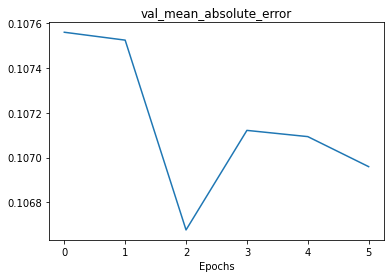

In [10]:
ltr_metrics.show_metrics_history()